In [571]:
import CAENReader
import sys
# import ROOT
from array import array
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import seaborn as sns
import pandas as pd


In [572]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 22
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [822]:
# infile_name = "190307-EJ309-1700V-SPE_2.dat"
# infile_name = "../../configFiles/data_wAmp.dat"
SiPM_ID = "PCB_1_1_LED4.4_test"
# SiPM_ID = "ABC"

infile_name = "/home/coure/SiPMs_QA/data/SiPM_%s/SiPM_%s.dat"%(SiPM_ID,SiPM_ID)
df = CAENReader.DataFile(infile_name)
print('Processing file:', infile_name)

Processing file: /home/coure/SiPMs_QA/data/SiPM_PCB_1_1_LED4.4_test/SiPM_PCB_1_1_LED4.4_test.dat


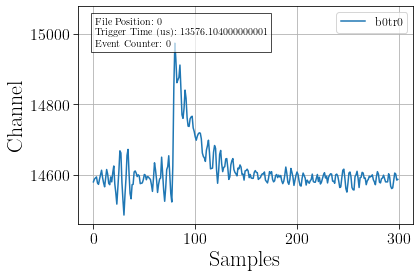

In [823]:
for i in range(0,1):
    tr = df.getNextTrigger()
#     if(i>85):
    tr.display(trName='b0tr0')

In [824]:
array = []
integ_ADC = []
df.file.seek(0)
while tr is not None:
# for i in range(0,50000):
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))

#     event_ID[0] = tr.eventCounter
#     trg_time[0] = int(round(tr.triggerTime * 1000)) # In ns
    bsl = np.mean(trace[0:20])
#     bsl = 0
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
#     array.append(array_trace)
    integ_ADC.append(sum(array_trace[70:120]))
    tr = df.getNextTrigger()


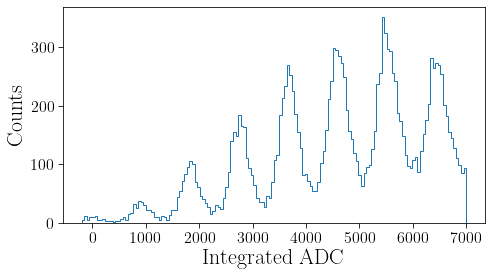

In [825]:
plt.figure(figsize=(7,4))
plt.hist(integ_ADC, bins = 150, histtype="step", range = (-200,7000), lw = 1);
# plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Integrated ADC')
# plt.xscale('log')
# plt.title("Berkeley MV, 40 min bkg run")
plt.tight_layout()
# plt.savefig("./plots/PMT_MV_40min_bkgRun.pdf")



In [826]:
len(trace)

300

In [827]:
# df = pd.DataFrame(integ_ADC, columns = ['integ_ADC'])
# 

In [828]:
# df.to_pickle("./test.pkl")

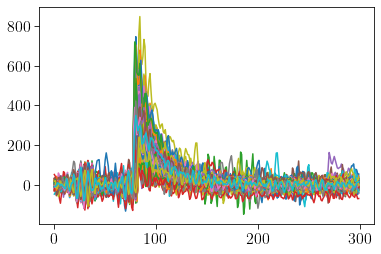

In [829]:
df.file.seek(0)

for i in range(0,200):
    tr = df.getNextTrigger()
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
#     array.append(array_trace)
    plt.plot(array_trace)
    tr = df.getNextTrigger()

(70.0, 150.0)

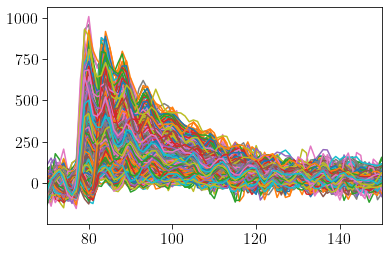

In [830]:
for i in range(0,2000):
    # Save waveform from specified channel ID
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for i in range(len(trace)):
        array_trace[i] = (trace[i]-bsl)
    plt.plot(array_trace)
    tr = df.getNextTrigger()
    
plt.xlim(70,150)

In [831]:
wf_array = []
# for i in range(0,200):
while tr is not None:
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for j in range(len(trace)):
        array_trace[j] = (trace[j]-bsl)
    wf_array.append(array_trace)
    tr = df.getNextTrigger()

(70.0, 150.0)

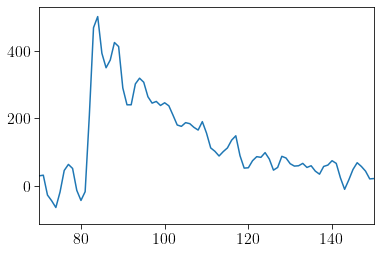

In [832]:
plt.plot(wf_array[2])
plt.xlim(70,150)

## Define needed variables for FFT

In [833]:
sampling_rate = 500E6 #Smp/s
sample_length = 1/sampling_rate #s

In [834]:
from scipy import fft
import scipy
def spectrum(values):
    """The FFT complex spectrum values of the signal."""
    return scipy.fft.rfft(values)

def frequencies(values, dt):
    """The FFT frequencies of the signal."""
    return scipy.fft.rfftfreq(n=len(values), d=dt)

In [835]:
spectrum_array = []
freq_array = []
for i in range(0,len(wf_array)):
    spectrum_array.append(abs(spectrum(wf_array[i])))
    freq_array.append(frequencies(wf_array[i],sample_length))
#     plt.plot(frequencies(wf_array[i],sample_length),abs(spectrum(wf_array[i])))
# plt.xlabel("Freq [MHz]")
# plt.yscale('log')
spectrum_array = np.array(spectrum_array)

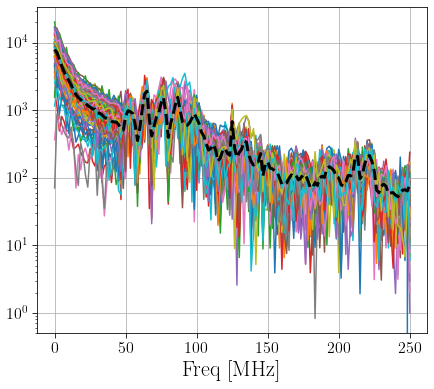

In [836]:
plt.figure(figsize=(7,6))

# np.mean(spectrum_array, axis=0)
# spectrum_array = []
for i in range(0,100):
    plt.plot(frequencies(wf_array[i],sample_length)/1E6,abs(spectrum(wf_array[i])))
plt.plot(frequencies(wf_array[0],sample_length)/1E6,np.mean(spectrum_array, axis=0), c = "black", ls = "--", lw = 3)
plt.xlabel("Freq [MHz]")
plt.yscale('log')
plt.grid()
# plt.plot(frequencies(wf_array[0],sample_length),np.mean(spectrum_array, axis=0))

In [837]:
spectrum_flat_list = [item for sublist in spectrum_array for item in sublist]
freq_flat_list = [item for sublist in freq_array for item in sublist]

Text(0.5, 1.0, 'Before')

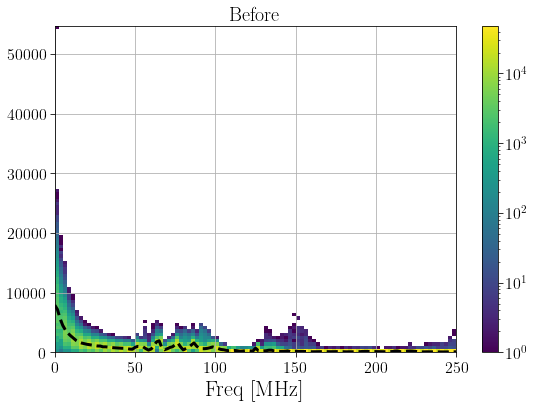

In [838]:
plt.figure(figsize=(9,6))

plt.hist2d(np.array(freq_flat_list)/1E6, spectrum_flat_list, bins = 100, norm=mpl.colors.LogNorm());
plt.plot(frequencies(wf_array[0],sample_length)/1E6,np.mean(spectrum_array, axis=0), c = "black", ls = "--", lw = 3,)

plt.xlabel("Freq [MHz]")
plt.colorbar()
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1E-2, 2500)
plt.title("Before")
# plt.title("Current")
# plt.savefig("Plots/SiPM_"+SiPM_ID+"_PSD_2D.pdf")

# v2.0

In [839]:
# SiPM_ID = "ABC"

In [840]:
infile_name = "/home/coure/SiPMs_QA/data/SiPM_%s/SiPM_%s.dat"%(SiPM_ID,SiPM_ID)
df = CAENReader.DataFile(infile_name)
outFolder = "/home/coure/SiPMs_QA/results/SiPM_%s/"%(SiPM_ID)

In [841]:
wf_array = []
integ_ADC = []
samples = []

tr = df.getNextTrigger()
while tr is not None:
    trace = tr.traces['b0tr0'].astype("float")
    array_trace = np.array(np.ones(len(trace)))
    bsl = np.mean(trace[0:20])
    for j in range(len(trace)):
        array_trace[j] = (trace[j]-bsl)
    wf_array.append(array_trace)
    integ_ADC.append(sum(array_trace[70:120]))
    samples.append(np.arange(0,300))
    tr = df.getNextTrigger()

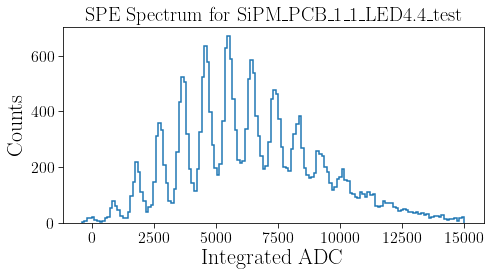

In [842]:
plt.figure(figsize=(7,4))
plt.hist(integ_ADC, bins = 150, histtype="step", lw = 1.5, range = (-400,15000));
plt.ylabel('Counts')
plt.xlabel('Integrated ADC')
plt.title("SPE Spectrum for SiPM_%s"%(SiPM_ID))
plt.tight_layout()
# plt.savefig(outFolder+"SPE_%s.pdf"%(SiPM_ID))
# del(integ_ADC)

## Perform fit

Text(0.5, 0, 'Integrated ADC [p.e]')

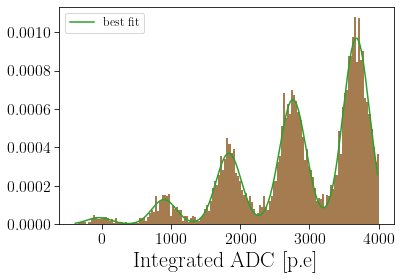

In [843]:
from lmfit.models import GaussianModel, ConstantModel
import scipy.signal
# x, y = np.loadtxt('Peaks.txt', unpack=True)
bin_heights, bin_borders, _ = plt.hist(np.array(integ_ADC), bins=150,range=(-400,4000), density=True, );
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

peaks_in_interval = scipy.signal.find_peaks_cwt(bin_heights, widths=10)
number_of_peaks = len(peaks_in_interval)
amplitude = bin_heights[peaks_in_interval]
width = np.zeros(number_of_peaks) + 100
center = bin_centers[peaks_in_interval]

def make_model(num):
    pref = "f{0}_".format(num)
    model = GaussianModel(prefix = pref)
    model.set_param_hint(pref+'amplitude', value=amplitude[num], min=1E-8, max=1000*amplitude[num])
    model.set_param_hint(pref+'center', value=center[num], min=center[num]-50, max=center[num]+50)
    model.set_param_hint(pref+'sigma', value=width[num], min=10., max=800)
    return model

mod = None
for i in range(len(peaks_in_interval)):
    this_mod = make_model(i)
    if mod is None:
        mod = this_mod
    else:
        mod = mod + this_mod

# offset = ConstantModel()
# offset.set_param_hint('c', value=np.average(bin_heights[-75:]))
mod = mod #+ offset

out=mod.fit(bin_heights, x=bin_centers)
# plt.interactive(True)
# print(out.fit_report())

plt.hist(np.array(integ_ADC), bins=150,range=(-400,4000), density=True, alpha=0.6);
# plt.scatter(bin_centers[peaks_in_interval],bin_heights[peaks_in_interval], c = "red", alpha = 0.3);

plt.plot(bin_centers, out.best_fit, label='best fit')
# plt.plot(bin_centers, out.init_fit, 'r--', label='fit with initial values')
plt.legend()

plt.xlabel("Integrated ADC [p.e]")

Text(0.5, 0, 'Integrated ADC [p.e]')

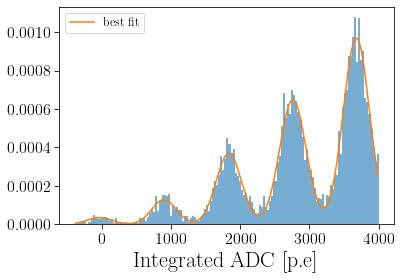

In [844]:
plt.hist(np.array(integ_ADC), bins=150,range=(-400,4000), density=True, alpha=0.6);
# plt.scatter(bin_centers[peaks_in_interval],bin_heights[peaks_in_interval], c = "red", alpha = 0.3);

plt.plot(bin_centers, out.best_fit, label='best fit')
# plt.plot(bin_centers, out.init_fit, 'r--', label='fit with initial values')
plt.legend()
plt.xlabel("Integrated ADC [p.e]")

Text(0.5, 1.0, 'Before')

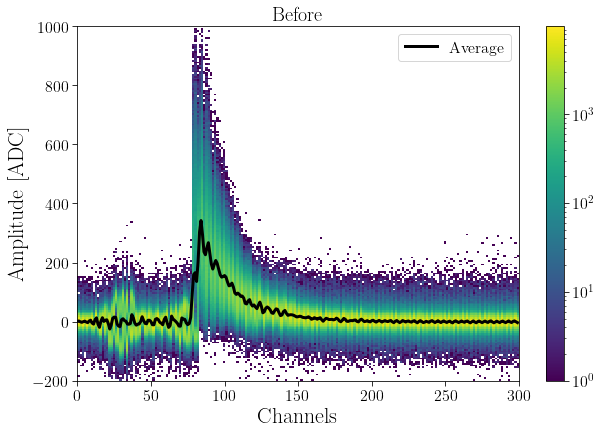

In [845]:
wf_flat_list = [item for sublist in wf_array for item in sublist]
samples_flat_list = [item for sublist in samples for item in sublist]

plt.figure(figsize=(9,6))

plt.hist2d(np.array(samples_flat_list), wf_flat_list,range = ([0,300],[-200,1000]), bins = 200, norm=mpl.colors.LogNorm());
plt.plot(np.mean(wf_array, axis=0), c = "black", ls = "-", lw = 3, label = "Average")

plt.xlabel("Channels")
plt.ylabel("Amplitude [ADC]")
plt.colorbar()
plt.legend(fontsize = 16)
plt.tight_layout()
plt.title("Before")
# plt.title("Current")
# plt.show()
# plt.savefig(outFolder+"wform_avg_hist2D_%s.pdf"%(SiPM_ID))
# del(samples, wf_flat_list, samples_flat_list)
# plt.savefig("Plots/SiPM_"+SiPM_ID+"_wform_2D.pdf")